**0. 복습문제**

포켓몬 캐릭터 수집하기

https://pokemon.fandom.com/ko/wiki/%EC%A0%84%EA%B5%AD%EB%8F%84%EA%B0%90

- request 모듈을 이용하여 1세대 포켓몬들을 수집합니다.
- 포켓몬 관동도감 번호, 전국도감 번호, 이름, 타입을 pandas 데이터프레임으로 수집합니다.
- 타입이 2개 이상인 경우, 첫번째 타입만 저장합니다. (버터플의 경우 벌레로 저장)

In [20]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd 

url = 'https://pokemon.fandom.com/ko/wiki/%EC%A0%84%EA%B5%AD%EB%8F%84%EA%B0%90'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

local_id = [0,]
world_id = [0,]
poke_name = [0,]
poke_type = [0,]

table = soup.find("table")
rows = table.find_all('tr')[1:]
for row in rows:
    tds = row.find_all('td')
    name = tds[3].text.strip()
    if poke_name[-1] == name: # 중복되는 것이 있을시에 마지막 넣은거랑 name이 같으면 
        continue
    local_id.append(int(tds[0].text[1:]))
    world_id.append(int(tds[1].text[1:])) 
    poke_name.append(name) 
    poke_type.append(tds[4].find('a').text.strip())
    
df = pd.DataFrame({
    '관동도감': local_id[1:],
    '전국도감': world_id[1:],
    '포켓몬': poke_name[1:],
    '타입': poke_type[1:],
})

print(df)
    

     관동도감  전국도감   포켓몬   타입
0       1     1  이상해씨    풀
1       2     2  이상해풀    풀
2       3     3  이상해꽃    풀
3       4     4   파이리   불꽃
4       5     5   리자드   불꽃
..    ...   ...   ...  ...
146   147   147    미뇽  드래곤
147   148   148    신뇽  드래곤
148   149   149   망나뇽  드래곤
149   150   150    뮤츠  에스퍼
150   151   151     뮤  에스퍼

[151 rows x 4 columns]


**1. Pandas 응용(1)**

1세대 포켓몬들 중 고스트타입 포켓몬은 흔치 않습니다. 데이터프레임에서 '고스트'타입 포켓몬들만 추출해보겠습니다.

In [23]:
condition = df['타입'] == '고스트'

df[condition]

,관동도감,전국도감,포켓몬,타입
91,92,92,고오스,고스트
92,93,93,고우스트,고스트
93,94,94,팬텀,고스트


**2. Pandas 응용(2): Merge**

1) requests 모듈을 이용하여 1세대 포켓몬들의 종족값(체력, 공격, 방어, 스피드, 특수)을 추출합니다. https://pokemon.fandom.com/ko/wiki/%EC%A2%85%EC%A1%B1%EA%B0%92_%EB%AA%A9%EB%A1%9D/1%EC%84%B8%EB%8C%80

2) Join을 이용하여 복습문제에서 수집한 테이블과 통합합니다.


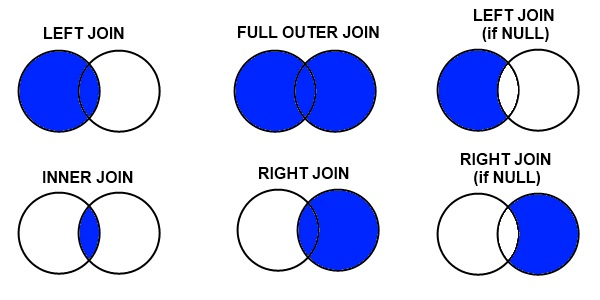

pd.merge(left = DF1 , right = DF2, how = "left", on="이름")

In [26]:
import pandas as pd
data_A = {'key': [1,2,3], 'name': ['Jane', 'John', 'Peter']}
dataframe_A = pd.DataFrame(data_A, columns = ['key', 'name'])
data_B = {'key': [2,3,4], 'age': [18, 15, 20]}
dataframe_B = pd.DataFrame(data_B, columns = ['key', 'age'])
print(dataframe_A)
print(dataframe_B)

pd.merge(dataframe_A, dataframe_B, left_on='key', right_on='key', how='outer') 
# outerjoin 왼쪽 key라는 이름과 오른쪽 key라는 이름을 매치시킨다.

   key   name
0    1   Jane
1    2   John
2    3  Peter
   key  age
0    2   18
1    3   15
2    4   20


,key,name,age
0,1,Jane,NaN
1,2,John,18.0
2,3,Peter,15.0
3,4,NaN,20.0


In [24]:
pd.merge(dataframe_A, dataframe_B, left_on='key', right_on='key', how='outer')


NameError: name 'dataframe_A' is not defined

In [46]:
df_LEFT_JOIN = pd.merge(dataframe_A, dataframe_B, left_on='key', right_on='key', how='left')
print(df_LEFT_JOIN)

   key   name   age
0    1   Jane   NaN
1    2   John  18.0
2    3  Peter  15.0


In [49]:
import requests
from bs4 import BeautifulSoup 
import pandas as pd 

url = 'https://pokemon.fandom.com/ko/wiki/%EC%A2%85%EC%A1%B1%EA%B0%92_%EB%AA%A9%EB%A1%9D'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')

poke_num = [0,]
health = [0,]
normal_attack = [0,]
normal_defense = [0,]
special_attack = [0,]
special_defense = [0,]
speed = [0,]

table = soup.find("table")
rows = table.find_all('tr')[1:]

for row in rows:
    tds = row.find_all('td')
    poke_num.append(int(tds[0].text[1:])) 
    health.append(int(tds[3].text.strip())) 
    normal_attack.append(int(tds[4].text.strip())) 
    normal_defense.append(int(tds[5].text.strip())) 
    special_attack.append(int(tds[6].text.strip())) 
    special_defense.append(int(tds[7].text.strip())) 
    speed.append(int(tds[8].text.strip())) 
    
    
species_df = pd.DataFrame({
    '전국도감': poke_num[1:],
    '체력': health[1:],
    '공격': normal_attack[1:],
    '방어': normal_defense[1:],
    '특수공격': special_attack[1:],
    '특수방어': special_defense[1:],
    '스피드': speed[1:],
    })



      관동도감  전국도감   포켓몬   타입    체력    공격    방어  특수공격  특수방어    스피드
0        1     1  이상해씨    풀  45.0  49.0  49.0  65.0  65.0   45.0
1        1     1  이상해씨    풀  60.0  50.0  70.0  80.0  80.0  140.0
2        1     1  이상해씨    풀  48.0  72.0  48.0  72.0  48.0   48.0
3        1     1  이상해씨    풀  70.0  65.0  65.0  55.0  55.0   70.0
4        1     1  이상해씨    풀  37.0  25.0  41.0  25.0  41.0   25.0
...    ...   ...   ...  ...   ...   ...   ...   ...   ...    ...
1081   147   147    미뇽  드래곤   NaN   NaN   NaN   NaN   NaN    NaN
1082   148   148    신뇽  드래곤   NaN   NaN   NaN   NaN   NaN    NaN
1083   149   149   망나뇽  드래곤   NaN   NaN   NaN   NaN   NaN    NaN
1084   150   150    뮤츠  에스퍼   NaN   NaN   NaN   NaN   NaN    NaN
1085   151   151     뮤  에스퍼   NaN   NaN   NaN   NaN   NaN    NaN

[1086 rows x 10 columns]


In [50]:
df3 = pd.merge(df, species_df, on='전국도감', how='left')

print(df3)

      관동도감  전국도감   포켓몬   타입    체력    공격    방어  특수공격  특수방어    스피드
0        1     1  이상해씨    풀  45.0  49.0  49.0  65.0  65.0   45.0
1        1     1  이상해씨    풀  60.0  50.0  70.0  80.0  80.0  140.0
2        1     1  이상해씨    풀  48.0  72.0  48.0  72.0  48.0   48.0
3        1     1  이상해씨    풀  70.0  65.0  65.0  55.0  55.0   70.0
4        1     1  이상해씨    풀  37.0  25.0  41.0  25.0  41.0   25.0
...    ...   ...   ...  ...   ...   ...   ...   ...   ...    ...
1081   147   147    미뇽  드래곤   NaN   NaN   NaN   NaN   NaN    NaN
1082   148   148    신뇽  드래곤   NaN   NaN   NaN   NaN   NaN    NaN
1083   149   149   망나뇽  드래곤   NaN   NaN   NaN   NaN   NaN    NaN
1084   150   150    뮤츠  에스퍼   NaN   NaN   NaN   NaN   NaN    NaN
1085   151   151     뮤  에스퍼   NaN   NaN   NaN   NaN   NaN    NaN

[1086 rows x 10 columns]


**3. 데이터프레임 살펴보기**

1) df['총합']에 체력, 공격, 방어, 스피드의 합을 넣습니다.

2) df.info, df.describe를 이용하여 데이터프레임을 살펴봅시다.

In [52]:
df3['총합'] = df3['체력'] + df3['공격'] + df3['방어'] + df3['특수공격'] +df3['특수방어'] +df3['스피드'] 

df3.describe() 

,관동도감,전국도감,체력,공격,방어,특수공격,특수방어,스피드,총합
count,1086.000000,1086.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,53.162063,53.162063,69.974855,80.269826,74.393617,72.478723,72.044487,68.456480,437.617988
std,32.405659,32.405659,26.412495,32.194558,31.373261,32.380603,27.956160,30.030777,120.788752
min,1.000000,1.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000
25%,26.000000,26.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000
50%,52.000000,52.000000,67.500000,78.000000,70.000000,65.000000,70.000000,65.000000,458.000000
75%,78.000000,78.000000,81.750000,100.000000,90.000000,94.000000,90.000000,90.000000,510.000000
max,151.000000,151.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000,1125.000000


**4. 데이터프레임 정렬하기**

총합에 따라 데이터를 정렬해봅시다. 어떤 포켓몬의 종족값 합이 크고, 어떤 포켓몬의 종족값 합이 작을까요? 데이터프레임 정렬 후, head와 tail을 사용해 살펴보도록 합시다.

df.sort_values('기준컬럼', ascending=False)
- ascending=True: 오름차순
- ascending=False: 내림차순



In [55]:
sorted_df3 =df3.sort_values('총합', ascending=False)
sorted_df3.head(n=10)
sorted_df3.tail(n=10)

,관동도감,전국도감,포켓몬,타입,체력,공격,방어,특수공격,특수방어,스피드,총합
1076,142,142,프테라,바위,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077,143,143,잠만보,노말,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1078,144,144,프리져,얼음,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1079,145,145,썬더,전기,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1080,146,146,파이어,불꽃,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1081,147,147,미뇽,드래곤,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1082,148,148,신뇽,드래곤,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1083,149,149,망나뇽,드래곤,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,150,150,뮤츠,에스퍼,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1085,151,151,뮤,에스퍼,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**5. 포켓몬 타입 별 비율 확인하기**

Collections의 Counter를 이용해 포켓몬의 속성 별 비율을 알아봅시다.

In [57]:
from collections import Counter

types = []
ratio =[]
for key,value in Counter(df3['타입']).most_common():
    print(key,value/len(df3)*100)
    types.append(key)
    ratio.append((value/len(df3)) * 100)

물 18.32412523020258
노말 14.088397790055248
독 11.602209944751381
벌레 10.589318600368323
풀 8.747697974217312
불꽃 8.655616942909761
전기 4.788213627992634
에스퍼 4.788213627992634
바위 4.6040515653775325
격투 4.511970534069982
땅 4.41988950276243
고스트 2.6703499079189688
페어리 1.7495395948434622
드래곤 0.2762430939226519
얼음 0.1841620626151013


**6. 시각화(1)**

plot()을 이용하면 선 그래프를 그릴 수 있습니다.

데이터프레임 뒤에 단순히 .plot()만 붙여봅시다.

<AxesSubplot: >

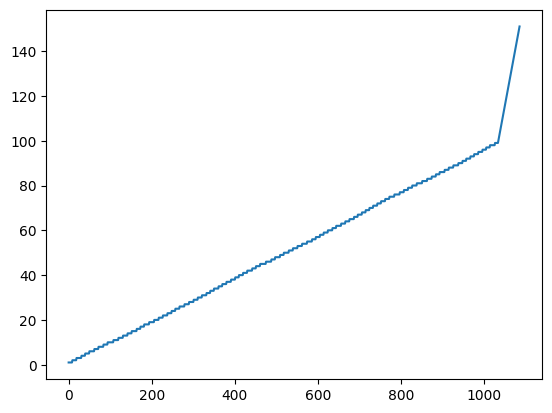

In [60]:
df3['관동도감'].plot()

<AxesSubplot: >

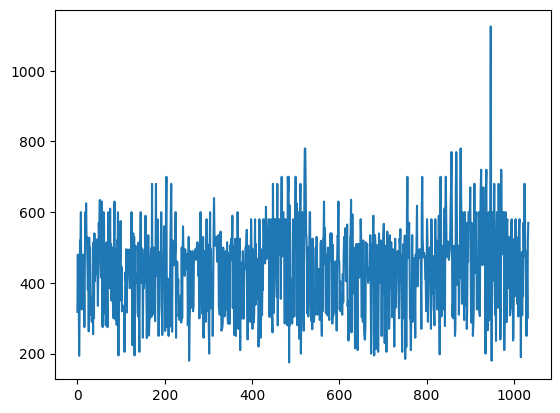

In [61]:
df3['총합'].plot()

**7. 시각화(2)**

Matplotlib의 pyplot을 이용하면 더 복잡한 시각화가 가능합니다.

https://wikidocs.net/book/5011

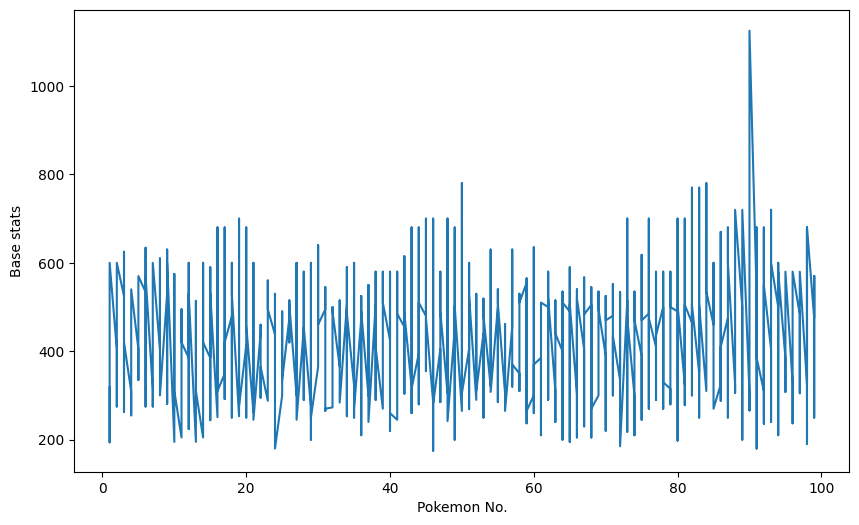

In [62]:
# plot
import matplotlib.pyplot as plt

x = df3['관동도감'].to_list()
y = df3['총합'].to_list()

plt.figure(figsize=(10, 6))			# 그래프 크기 지정
plt.xlabel('Pokemon No.')		    # 그래프 x축 이름(label) 지정
plt.ylabel('Base stats')	     	# 그래프 y축 이름(label) 지정
plt.plot(x, y)
plt.show()

**8. 시각화(3)**

5에서 구한 포켓몬 속성 비율을 시각화 해봅시다.

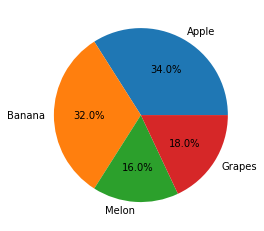

In [43]:
# 원 그래프 그리기
import matplotlib.pyplot as plt

ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

ValueError: could not convert string to float: '이상해씨'

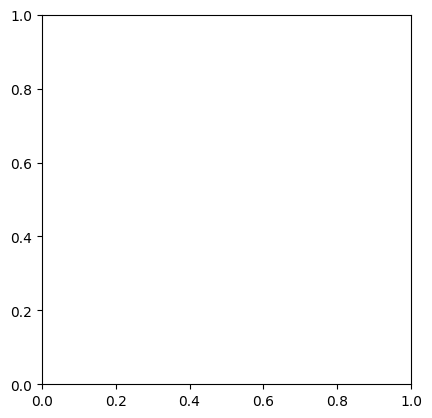

In [64]:
import matplotlib.pyplot as plt

plt.pie(df3, labels='체력', autopct='%.1f%%')
plt.show()